#### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1721 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.56157774 0.5380483  0.5929503 ]
  [0.5583449  0.5348155  0.58971745]
  [0.5552255  0.5316961  0.58659804]
  ...
  [0.61198527 0.6041421  0.6590441 ]
  [0.730893   0.7230499  0.77795184]
  [0.6952511  0.687408   0.7423099 ]]

 [[0.58847153 0.5649421  0.6198441 ]
  [0.5851471  0.5616177  0.61651963]
  [0.5815077  0.5579783  0.61288023]
  ...
  [0.62651455 0.6186714  0.6735734 ]
  [0.72892153 0.7210784  0.77598035]
  [0.6924914  0.6846483  0.73955023]]

 [[0.5999118  0.5763824  0.63128436]
  [0.5985727  0.57504326 0.6299452 ]
  [0.5970129  0.57348347 0.6283854 ]
  ...
  [0.6426316  0.63478845 0.6896904 ]
  [0.7237225  0.7158794  0.77078134]
  [0.6904118  0.6825686  0.7374706 ]]

 ...

 [[0.6449265  0.6331618  0.7076716 ]
  [0.64402115 0.63225645 0.7008453 ]
  [0.62166053 0.6098958  0.6765625 ]
  ...
  [0.7627758  0.75493264 0.80591303]
  [0.761736   0.75389284 0.8048732 ]
  [0.75946116 0.751618   0.8025984 ]]

 [[0.6527251  0.6409604  0.7154702 ]
  [0.6414217  0.629657   0.69720596]


In [17]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [18]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [19]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.53221655 0.5243734  0.57927537]
  [0.53231627 0.52447313 0.57937515]
  [0.53241605 0.5245729  0.57947487]
  ...
  [0.47170255 0.45601627 0.5148398 ]
  [0.4874243  0.47173804 0.53056157]
  [0.49972716 0.4840409  0.54286444]]

 [[0.5204873  0.5126442  0.5675461 ]
  [0.52128536 0.5134422  0.56834424]
  [0.5220835  0.5142404  0.56914234]
  ...
  [0.4716028  0.45591652 0.51474005]
  [0.4880229  0.47233662 0.5311602 ]
  [0.49992666 0.48424038 0.54306394]]

 [[0.4935821  0.48573896 0.5406409 ]
  [0.49398112 0.486138   0.54103994]
  [0.49438018 0.48653704 0.541439  ]
  ...
  [0.47150305 0.45581678 0.5146403 ]
  [0.48862147 0.47293517 0.5317587 ]
  [0.5001262  0.4844399  0.5432635 ]]

 ...

 [[0.78064454 0.78064454 0.82770336]
  [0.7612992  0.7612992  0.808358  ]
  [0.7244482  0.7244482  0.771507  ]
  ...
  [0.6830052  0.6751621  0.73006403]
  [0.68350405 0.6756609  0.73056287]
  [0.6840028  0.6761597  0.7310617 ]]

 [[0.7802455  0.7802455  0.8273043 ]
  [0.7605011  0.7605011  0.8075599 ]


### Building the Model

In [20]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
1506/32

47.0625

In [24]:
215/32

6.71875

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 79s 2s/step - loss: 0.9343 - accuracy: 0.4749 - val_loss: 0.8648 - val_accuracy: 0.4583
Epoch 2/20
47/47 [==============================] - 70s 1s/step - loss: 0.8704 - accuracy: 0.5133 - val_loss: 0.7903 - val_accuracy: 0.7031
Epoch 3/20
47/47 [==============================] - 63s 1s/step - loss: 0.6168 - accuracy: 0.7201 - val_loss: 0.5027 - val_accuracy: 0.7969
Epoch 4/20
47/47 [==============================] - 63s 1s/step - loss: 0.3646 - accuracy: 0.8484 - val_loss: 0.3416 - val_accuracy: 0.8802
Epoch 5/20
47/47 [==============================] - 63s 1s/step - loss: 0.3116 - accuracy: 0.8751 - val_loss: 0.2638 - val_accuracy: 0.8802
Epoch 6/20
47/47 [==============================] - 63s 1s/step - loss: 0.2528 - accuracy: 0.8998 - val_loss: 0.3856 - val_accuracy: 0.8906
Epoch 7/20
47/47 [==============================] - 63s 1s/step - loss: 0.2610 - accuracy: 0.8965 - val_loss: 0.2628 - val_accuracy: 0.8854
Epoch 8/20
47/47 [==

In [26]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 4s 632ms/step - loss: 0.0932 - accuracy: 0.9722


In [27]:
scores

[0.09320594370365143, 0.9722222089767456]

### Plotting the Accuracy and Loss Curves

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [32]:
type(history.history['loss'])

list

In [33]:
len(history.history['loss'])

20

In [34]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.9342879056930542,
 0.870400071144104,
 0.6167938709259033,
 0.36458733677864075,
 0.3116307854652405]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
val_acc

[0.4583333432674408,
 0.703125,
 0.796875,
 0.8802083134651184,
 0.8802083134651184,
 0.890625,
 0.8854166865348816,
 0.9166666865348816,
 0.9010416865348816,
 0.9322916865348816,
 0.9479166865348816,
 0.96875,
 0.859375,
 0.9375,
 0.9739583134651184,
 0.9427083134651184,
 0.9114583134651184,
 0.953125,
 0.953125,
 0.9479166865348816]

In [38]:
acc

[0.4749498963356018,
 0.5132978558540344,
 0.7201068997383118,
 0.8483633995056152,
 0.8750835061073303,
 0.8997995853424072,
 0.8964595794677734,
 0.9325317144393921,
 0.9265196919441223,
 0.9318637251853943,
 0.9185037016868591,
 0.9545758366584778,
 0.9505677819252014,
 0.9438877701759338,
 0.9639278650283813,
 0.9719439148902893,
 0.9465597867965698,
 0.9719439148902893,
 0.9712758660316467,
 0.9699398875236511]

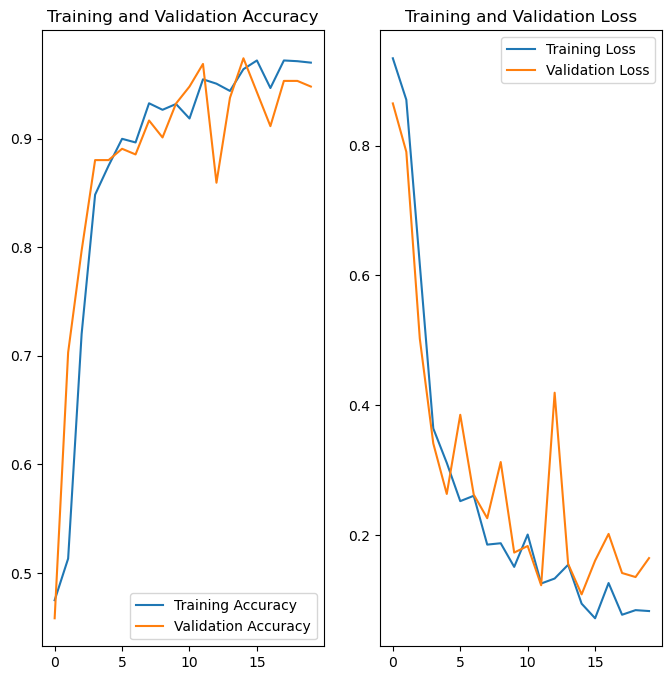

In [39]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image


first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 297ms/step
predicted label: Potato___Late_blight


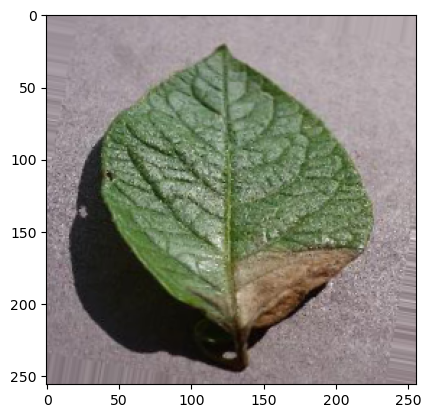

In [43]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference


In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 20ms/step


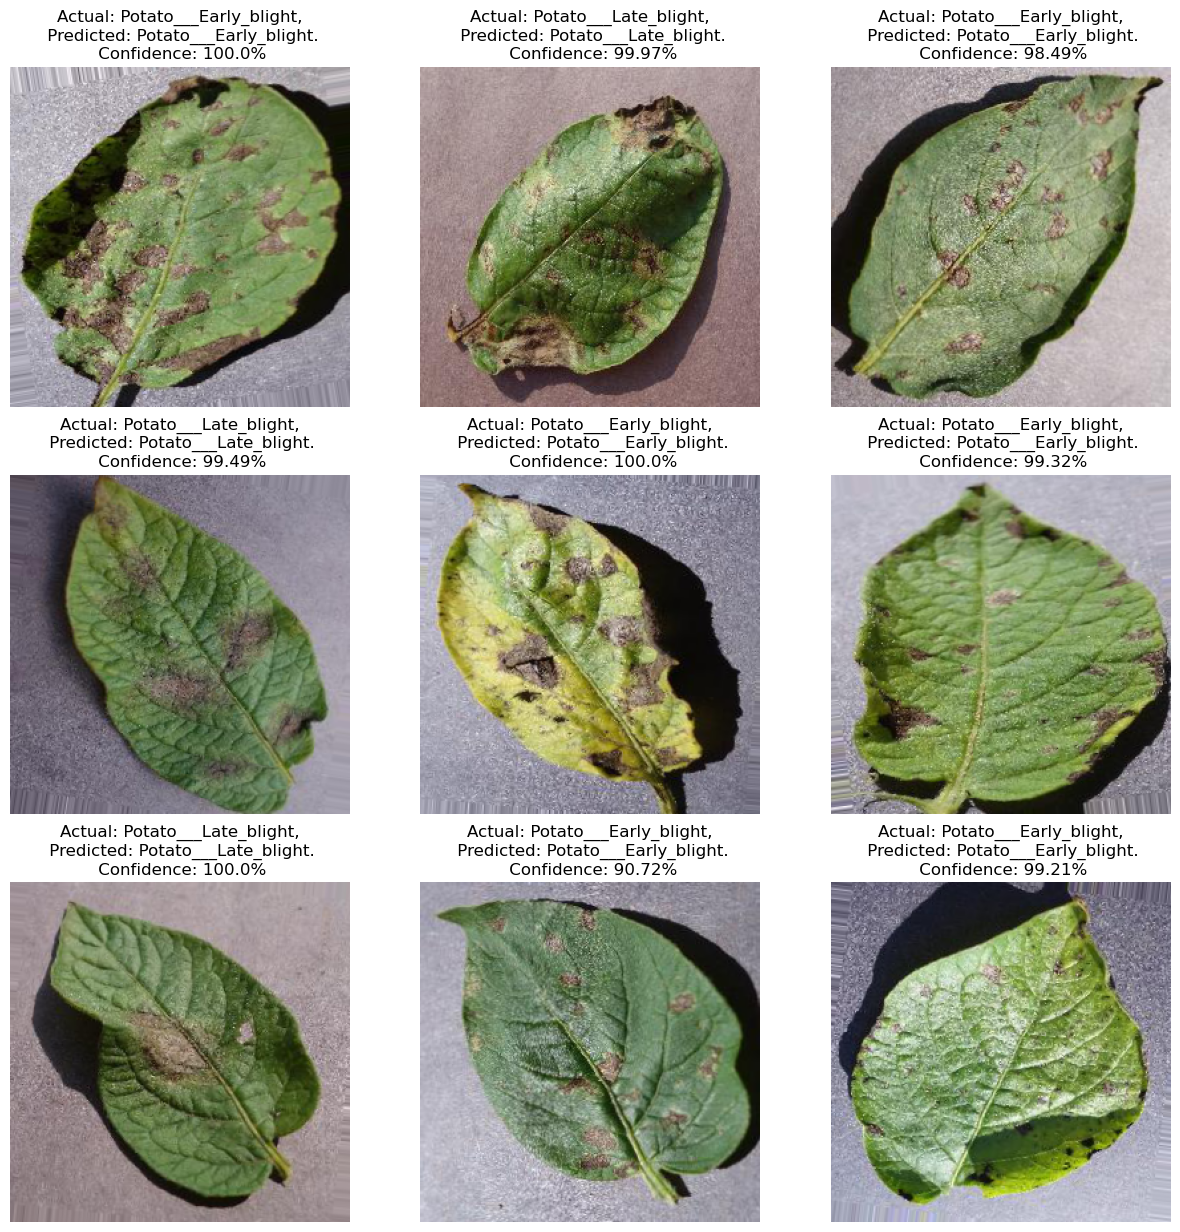

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [46]:
model.save("../potatoes.h5")